#**Lab 4: The Multi-Layer Perceptron**
##### By William Cooper (Undergraduate) and Grant Palmer (Undergraduate)

### **Data Set:** US Census Demographic Data
(https://www.kaggle.com/datasets/muonneutrino/us-census-demographic-data/data)


## **Load, Split, and Balance (1.5 points total)**
*   [.5 points] (1) Load the data into memory and save it to a pandas data frame. Do not normalize or one-hot encode any of the features until asked to do so later in the rubric. (2) Remove any observations that having missing data. (3) Encode any string data as integers for now. (4) You have the option of keeping the "county" variable or removing it. Be sure to discuss why you decided to keep/remove this variable.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/acs2017_census_tract_data.csv')
df = pd.DataFrame(data)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           74001 non-null  int64  
 1   State             74001 non-null  object 
 2   County            74001 non-null  object 
 3   TotalPop          74001 non-null  int64  
 4   Men               74001 non-null  int64  
 5   Women             74001 non-null  int64  
 6   Hispanic          73305 non-null  float64
 7   White             73305 non-null  float64
 8   Black             73305 non-null  float64
 9   Native            73305 non-null  float64
 10  Asian             73305 non-null  float64
 11  Pacific           73305 non-null  float64
 12  VotingAgeCitizen  74001 non-null  int64  
 13  Income            72885 non-null  float64
 14  IncomeErr         72885 non-null  float64
 15  IncomePerCap      73256 non-null  float64
 16  IncomePerCapErr   73256 non-null  float6

In [ ]:
#getting rid of all columns with missing values/data
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72718 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           72718 non-null  int64  
 1   State             72718 non-null  object 
 2   County            72718 non-null  object 
 3   TotalPop          72718 non-null  int64  
 4   Men               72718 non-null  int64  
 5   Women             72718 non-null  int64  
 6   Hispanic          72718 non-null  float64
 7   White             72718 non-null  float64
 8   Black             72718 non-null  float64
 9   Native            72718 non-null  float64
 10  Asian             72718 non-null  float64
 11  Pacific           72718 non-null  float64
 12  VotingAgeCitizen  72718 non-null  int64  
 13  Income            72718 non-null  float64
 14  IncomeErr         72718 non-null  float64
 15  IncomePerCap      72718 non-null  float64
 16  IncomePerCapErr   72718 non-null  float64
 17

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the label encoder
le = LabelEncoder()

#applying label encoding to these columns
df['County'] = le.fit_transform(df['County'])
df['State'] = le.fit_transform(df['State'])

df = df.drop(['County', 'TractId'], axis=1)


We decided to remove the county dataframe as it creates too many columns if we were to one-hot encode every different county. Although vaing each county would help with future accuracy, the amount of columns we would need would be hard to visualize in graphs, displays, or any other visual demonstrations.

In [ ]:
df.head()

,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,0,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,0,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,0,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,0,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3




*   The next two requirements will need to be completed together as they might depend on one another:
  * [.5 points] Balance the dataset so that about the same number of instances are within each class. Choose a method for balancing the dataset and explain your reasoning for selecting this method. One option is to choose quantization thresholds for the "ChildPoverty" variable that equally divide the data into four classes. Should balancing of the dataset be done for both the training and testing set? Explain.
  *   [.5 points] Assume you are equally interested in the classification performance for each class in the dataset. Split the dataset into 80% for training and 20% for testing. There is no need to split the data multiple times for this lab.
  
Note: You will need to one hot encode the target, but do not one hot encode the categorical data until instructed to do so in the lab.



In [ ]:
#Binning the "ChildPoverty" variable to equally divide the data into four classes
df['ChildPoverty_4'] = pd.qcut(df['ChildPoverty'], q=4, labels=['Low', 'Moderate', 'High', 'Excessive'])
df.drop('ChildPoverty', axis=1, inplace=True)

In [ ]:
#label encoding our new ChildPoverty_4 class
le = LabelEncoder()

df['ChildPoverty_4'] = le.fit_transform(df['ChildPoverty_4'])

df.head()

,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,ChildPoverty_4
0,0,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,...,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6,1
1,0,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,...,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4,0
2,0,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,...,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7,1
3,0,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,...,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1,2
4,0,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,...,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3,1


We think that balancing of the dataset does not need to be done for both the training and testing set. Balancing the training dataset is very important to the learning process and prevents bias from occurring. Because of this, balancing is important to training the dataset. We think that for testing the dataset, balancing should not be implemented because in a way it is manipulating data and can lead to results that are not accurate to real analysis.

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

X = np.array(df.drop(['ChildPoverty_4'], axis=1))
y = df['ChildPoverty_4']

# Splitting the dataset into training (80%) and testing (20%) sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, stratify=df['ChildPoverty_4'])
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

## **Pre-processing and Initial Modeling (2.5 points total)**


*   You will be using a two layer perceptron from class for the next few parts of the rubric. There are several versions of the two layer perceptron covered in class, with example code. When selecting an example two layer network from class be sure that you use: (1) vectorized gradient computation, (2) mini-batching, (3) cross entropy loss, and (4) proper Glorot initialization, at a minimum. There is no need to use momentum or learning rate reduction (assuming you choose a sufficiently small learning rate). It is recommended to use sigmoids throughout the network, but not required.




In [ ]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import pandas as pd
import sys

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta

    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T

        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_ + 1) # reshape to be W

        W2_num_elems = (self.n_hidden + 1)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden + 1)

        return W1, W2

    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new

    def _L2_reg(self, lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))

    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term

    def _feedforward(self, X, W1, W2):
        A1 = self._add_bias_unit(X, how='column')
        A1 = A1.T
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3

    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = -2*(Y_enc-A3)*A3*(1-A3)
        V1 = A2*(1-A2)*(W2.T @ V2)

        grad2 = V2 @ A2.T
        grad1 = V1[1:,:] @ A1.T


        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C

        return grad1, grad2

    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred

In [ ]:
from sklearn.metrics import accuracy_score
# just start with the vectorized version and minibatch
class TLPMiniBatch(TwoLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.1,
                 decrease_iter = 10, shuffle=True,
                 minibatches=1, **kwds):
        # need to add to the original initializer
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.decrease_iter = decrease_iter
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)


    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()

        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))

        for i in range(self.epochs):

            # adaptive learning rate
            # decrease at certain epochs
            eta = self.eta * self.decrease_const**(np.floor(i/self.decrease_iter))

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2
                                                      )

                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2,
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2)



                # simple momentum calculations

                rho_W1, rho_W2 = eta * grad1, eta * grad2
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                rho_W1_prev, rho_W2_prev = rho_W1, rho_W2


            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))

            # update if a validation set was provided
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test,yhat))

        return self

In [ ]:
class TLPMiniBatchCrossEntropy(TLPMiniBatch):
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A3)+(1-Y_enc)*np.log(1-A3))))
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term

    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = (A3-Y_enc) # <- this is only line that changed
        V1 = A2*(1-A2)*(W2.T @ V2)

        grad2 = V2 @ A2.T
        grad1 = V1[1:, :] @ A1.T

        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C

        return grad1, grad2

In [ ]:
class TLPBetterInitial(TLPMiniBatchCrossEntropy):
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_ + 1))
        W1[:, :1] = 0

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden + 1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden + 1))
        W2[:, :1] = 0

        return W1, W2

* [.5 points] Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Do not normalize or one-hot encode the data (not yet). Be sure that training converges by graphing the loss function versus the number of epochs.

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

def print_result(nn,X_train,y_train,X_test,y_test,title="",color="red"):

    print("=================")
    print(title,":")
    yhat = nn.predict(X_train)
    print('Resubstitution acc:',accuracy_score(y_train,yhat))
    print(set(yhat))


    yhat = nn.predict(X_test)
    print('Validation acc:',accuracy_score(y_test,yhat))
    print(set(yhat))


    if hasattr(nn,'val_score_'):
        plt.plot(range(len(nn.val_score_)), nn.val_score_, color=color,label=title)
        plt.ylabel('Validation Accuracy')
    else:
        plt.plot(range(len(nn.score_)), nn.score_, color=color,label=title)
        plt.ylabel('Resub Accuracy')

    plt.xlabel('Epochs')
    plt.tight_layout()
    plt.legend(loc='best')
    plt.grid(True)

Epoch: 100/100

CPU times: user 34.9 s, sys: 23.8 s, total: 58.7 s
Wall time: 40.7 s
Long Run :
Resubstitution acc: 0.7116237494413312
{0, 1, 2, 3}
Validation acc: 0.7145902090209021
{0, 1, 2, 3}


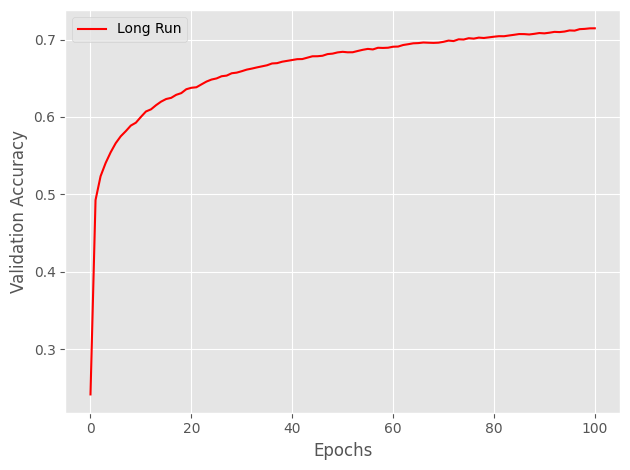

In [ ]:
# just for fun, let's look at the output of what happens when we let our system loose
# these values have been hand tuned
vals = {'n_hidden':30,
         'C':0.1, 'epochs':100, 'eta':0.0001,
         'alpha':0.001, 'decrease_const':1,
         'minibatches':50,
         'shuffle':True,'random_state':1}

nn_long_sigmoid = TLPBetterInitial(**vals)

%time nn_long_sigmoid.fit(X_train, y_train, print_progress=1, XY_test=(X_test,y_test))
evals1=nn_long_sigmoid.val_score_
print_result(nn_long_sigmoid,X_train,y_train,X_test,y_test,title="Long Run",color="red")

* [.5 points] Now (1) normalize the continuous numeric feature data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs.  

In [ ]:
df_norm = df.drop(['State', 'ChildPoverty_4'], axis=1)

df_norm = (df_norm - df_norm.mean()) / df_norm.std()
df_norm['State'] = df['State']
df_norm['ChildPoverty_4'] = df['ChildPoverty_4']

df_norm.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,State,ChildPoverty_4
0,-1.186424,-1.168560,-1.167630,-0.644718,0.815033,-0.373213,-0.161520,-0.394912,-0.143895,-1.146470,...,-0.666355,-0.222718,-1.071600,-0.667537,0.984049,-0.439008,-0.379141,-0.514748,0,1
1,-1.037121,-0.924913,-1.115167,-0.701033,-0.644414,1.911175,-0.161520,-0.417145,-0.143895,-0.984498,...,-1.223276,-0.546859,-1.097490,-0.453898,0.118706,0.745607,-0.379141,-0.750069,0,0
2,-0.483286,-0.592172,-0.362014,-0.402130,0.002052,0.613754,-0.028358,-0.450495,0.250117,-0.437100,...,-0.825475,-0.420021,-0.535045,-0.780640,0.970092,-0.360034,1.170801,-0.495138,0,1
3,-0.080580,-0.166700,0.006116,-0.332820,0.619134,-0.285174,-0.050552,-0.506078,-0.143895,0.076582,...,-0.666355,-0.025415,-0.207399,-0.466465,0.774692,-0.439008,-0.379141,-0.220597,0,2
4,2.521029,2.608869,2.358053,-0.709697,0.527715,0.145755,-0.161520,-0.183697,-0.143895,2.702506,...,-1.037635,-0.715976,2.415559,-1.019413,1.388806,-0.439008,-0.379141,-0.965780,0,1


In [ ]:
X = np.array(df_norm.drop(['ChildPoverty_4'], axis=1))
y = df_norm['ChildPoverty_4']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8,
                                                    stratify=df_norm['ChildPoverty_4'])

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

Epoch: 100/100

CPU times: user 34.9 s, sys: 24.3 s, total: 59.2 s
Wall time: 40.5 s
Long Run :
Resubstitution acc: 0.7116237494413312
{0, 1, 2, 3}
Validation acc: 0.7145902090209021
{0, 1, 2, 3}


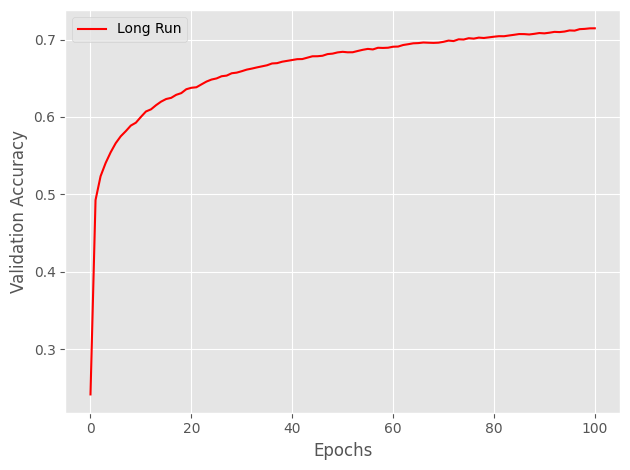

In [ ]:
#just for fun, let's look at the output of what happens when we let our system loose
# these values have been hand tuned
vals = {'n_hidden':30,
         'C':0.1, 'epochs':100, 'eta':0.0001,
         'alpha':0.001, 'decrease_const':1,
         'minibatches':50,
         'shuffle':True,'random_state':1}

nn_long_sigmoid = TLPBetterInitial(**vals)

%time nn_long_sigmoid.fit(X_train, y_train, print_progress=1, XY_test=(X_test,y_test))
evals2=nn_long_sigmoid.val_score_
print_result(nn_long_sigmoid,X_train,y_train,X_test,y_test,title="Long Run",color="red")

* [.5 points] Now(1) normalize the continuous numeric feature data AND (2) one hot encode the categorical data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs.

In [ ]:
oneHot = pd.get_dummies(df_norm['State'], columns=['State'], dtype=int)
df_oneHot = df_norm.join(oneHot)
df_oneHot.drop(['State'], axis=1, inplace=True)

X = np.array(df_oneHot.drop(['ChildPoverty_4'], axis=1))
y = df_oneHot['ChildPoverty_4']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8,
                                                    stratify=df_oneHot['ChildPoverty_4'])

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)



Epoch: 100/100

CPU times: user 35.4 s, sys: 25.1 s, total: 1min
Wall time: 48.4 s
Long Run :
Resubstitution acc: 0.7116237494413312
{0, 1, 2, 3}
Validation acc: 0.7145902090209021
{0, 1, 2, 3}


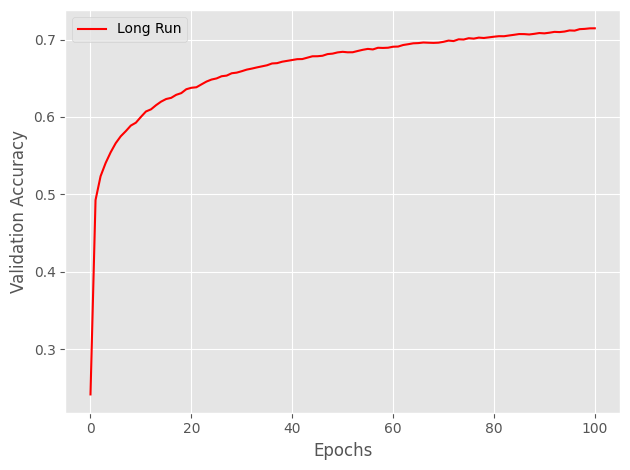

In [ ]:
#just for fun, let's look at the output of what happens when we let our system loose
# these values have been hand tuned
vals = {'n_hidden':30,
         'C':0.1, 'epochs':100, 'eta':0.0001,
         'alpha':0.001, 'decrease_const':1,
         'minibatches':50,
         'shuffle':True,'random_state':1}

nn_long_sigmoid = TLPBetterInitial(**vals)

%time nn_long_sigmoid.fit(X_train, y_train, print_progress=1, XY_test=(X_test,y_test))
evals3=nn_long_sigmoid.val_score_
print_result(nn_long_sigmoid,X_train,y_train,X_test,y_test,title="Long Run",color="red")

* [1 points] Compare the performance of the three models you just trained. Are there any meaningful differences in performance? Explain, in your own words, why these models have (or do not have) different performances.



When looking at the three different models we just trained, we have come to the conclusion that there are meaningful differences in performance. When the data is not normalized or one hot encoded, the validation accuracy among the 100 different epochs is super low. When the data is normalized but not one hot encoded we begin to see vast improvements in validation accuracy among the 100 different Epochs. Finally, when we look at the data that is both one hot encoded and normalized we get the best validation accuracy. Not only this but we see improved resubstitution on the one hot encoded and normalized data set. Because of these improvements, we can easily see meaningful differences in the different models' performance. These models all have different performances because both normalization and one hot encoding allows for higher accuracies and better learning rates across the data set.

## **Modeling (5 points total)**


*   [1 points] Add support for a third layer in the multi-layer perceptron. Add support for saving (and plotting after training is completed) the average magnitude of the gradient for each layer, for each epoch (like we did in the flipped module for back propagation). For magnitude calculation, you are free to use either the average absolute values or the L1/L2 norm.
  * Quantify the performance of the model and graph the magnitudes for each layer versus the number of epochs.


In [ ]:
from sklearn.metrics import accuracy_score
# just start with the vectorized version and minibatch
class ThreeLayerPerceptronBase(TwoLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.1,
                 decrease_iter = 20, shuffle=True,
                 minibatches=1, **kwds):
        # need to add to the original initializer
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.decrease_iter = decrease_iter
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)

    def _L2_reg(self, lambda_, W1, W2, W3):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2))

    def _cost(self,A4,Y_enc,W1,W2,W3):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc * np.log(A4) + (1-Y_enc) * np.log(1-A4))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3)
        return cost + L2_term

    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_))

        init_bound2 = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W2 = np.random.uniform(-init_bound2, init_bound2,(self.n_hidden, self.n_hidden))

        init_bound3 = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W3 = np.random.uniform(-init_bound3, init_bound3,(self.n_output_, self.n_hidden))

        # set these to zero to start so that
        # they do not immediately saturate the neurons
        b1 = np.zeros((self.n_hidden, 1))
        b2 = np.zeros((self.n_hidden, 1))
        b3 = np.zeros((self.n_output_, 1))

        return W1, W2, W3, b1, b2, b3

    def _feedforward(self, X, W1, W2, W3, b1, b2, b3):
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)

        return A1, Z1, A2, Z2, A3, Z3, A4

    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V3 = A4 - Y_enc
        V2 = A3*(1-A3)*(W3.T @ V3)
        V1 = A2*(1-A2)*(W2.T @ V2)

        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb3 = np.sum(V3, axis=1).reshape((-1,1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))


        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C

        return gradW1, gradW2, gradW3, gradb1, gradb2, gradb3

    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.b1, self.b2, self.b3 = self._initialize_weights()

        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum
        rho_W3_prev = np.zeros(self.W3.shape) # for momentum

        # tracking gradient magnitudes
        self.grad_w1 = np.zeros(self.epochs)
        self.grad_w2 = np.zeros(self.epochs)
        self.grad_w3 = np.zeros(self.epochs)

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            self.val_cost_ = []

        for i in range(self.epochs):

            # adaptive learning rate
            # decrease at certain epochs
            eta = self.eta * self.decrease_const**(np.floor(i/self.decrease_iter))

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4 = self._feedforward(X_data[idx],
                                                       self.W1, self.W2, self.W3,
                                                       self.b1, self.b2, self.b3)

                cost = self._cost(A4,Y_enc[:, idx],self.W1,self.W2,self.W3)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradW3, gradb1, gradb2, gradb3 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4,
                                                                                    Z1=Z1, Z2=Z2,Z3=Z3,
                                                                                    Y_enc=Y_enc[:, idx], W1=self.W1,W2=self.W2, W3=self.W3)

                # Track the magnitude of the gradient
                self.grad_w1[i] = np.abs(gradW1).mean()
                self.grad_w2[i] = np.abs(gradW2).mean()
                self.grad_w3[i] = np.abs(gradW3).mean()

                # simple momentum calculations
                rho_W1, rho_W2, rho_W3 = eta * gradW1, eta * gradW2, eta * gradW3
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev)) # update with momentum

                self.b1 -= eta * gradb1
                self.b2 -= eta * gradb2
                self.b3 -= eta * gradb3

                rho_W1_prev, rho_W2_prev, rho_W3_prev = rho_W1, rho_W2, rho_W3


            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))

            # update if a validation set was provided
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test,yhat))

        return self

    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, A4 = self._feedforward(X, self.W1, self.W2, self.W3, self.b1, self.b2, self.b3)
        y_pred = np.argmax(A4, axis=0)
        return y_pred

Epoch: 200/200

CPU times: user 1min 38s, sys: 55.3 s, total: 2min 33s
Wall time: 1min 34s
Long Run :
Resubstitution acc: 0.7363770756695431
{0, 1, 2, 3}
Validation acc: 0.735492299229923
{0, 1, 2, 3}


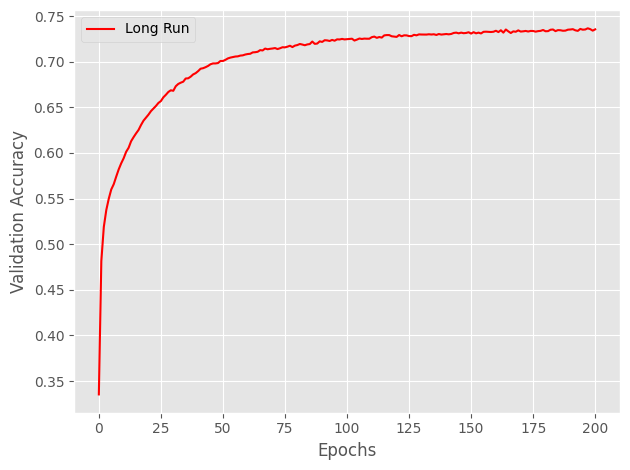

In [ ]:
#just for fun, let's look at the output of what happens when we let our system loose
# these values have been hand tuned
vals = {'n_hidden':30,
         'C':0.1, 'epochs':200, 'eta':0.0001,
         'alpha':0.001, 'decrease_const':1,
         'minibatches':50,
         'shuffle':True,'random_state':1}

nn_long_sigmoid = ThreeLayerPerceptronBase(**vals)

%time nn_long_sigmoid.fit(X_train, y_train, print_progress=1, XY_test=(X_test,y_test))
print_result(nn_long_sigmoid,X_train,y_train,X_test,y_test,title="Long Run",color="red")

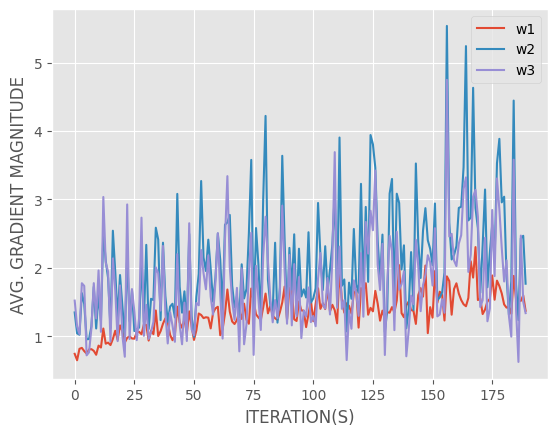

In [ ]:
ax = plt.subplot(1,1,1)
plt.plot(np.abs(nn_long_sigmoid.grad_w1[10:]), label='w1')
plt.plot(np.abs(nn_long_sigmoid.grad_w2[10:]), label='w2')
plt.plot(np.abs(nn_long_sigmoid.grad_w3[10:]), label='w3')
plt.legend()
plt.ylabel('AVG. GRADIENT MAGNITUDE')
plt.xlabel('ITERATION(S)')
plt.show()

* [1 points] Repeat the previous step, adding support for a fourth layer.

In [ ]:
from sklearn.metrics import accuracy_score
# just start with the vectorized version and minibatch
class FourLayerPerceptronBase(ThreeLayerPerceptronBase):


    def _L2_reg(self, lambda_, W1, W2, W3, W4):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2) + np.mean(W4[:, 1:] ** 2))

    def _cost(self,A5,Y_enc,W1,W2,W3,W4):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc * np.log(A5) + (1-Y_enc) * np.log(1-A5))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4)
        return cost + L2_term

    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_))

        init_bound2 = 4*np.sqrt(6 / (self.n_hidden + self.n_hidden))
        W2 = np.random.uniform(-init_bound2, init_bound2,(self.n_hidden, self.n_hidden))

        init_bound3 = 4*np.sqrt(6 / (self.n_hidden + self.n_hidden))
        W3 = np.random.uniform(-init_bound3, init_bound3,(self.n_hidden, self.n_hidden))

        init_bound4 = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W4 = np.random.uniform(-init_bound4, init_bound4,(self.n_output_, self.n_hidden))

        # set these to zero to start so that
        # they do not immediately saturate the neurons
        b1 = np.zeros((self.n_hidden, 1))
        b2 = np.zeros((self.n_hidden, 1))
        b3 = np.zeros((self.n_hidden, 1))
        b4 = np.zeros((self.n_output_, 1))

        return W1, W2, W3, W4, b1, b2, b3, b4

    def _feedforward(self, X, W1, W2, W3, W4, b1, b2, b3, b4):
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)
        Z4 = W4 @ A4 + b4
        A5 = self._sigmoid(Z4)

        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5

    def _get_gradient(self, A1, A2, A3, A4, A5, Z1, Z2, Z3, Z4, Y_enc, W1, W2, W3, W4):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V4 = A5 - Y_enc
        V3 = A4*(1-A4)*(W4.T @ V4)
        V2 = A3*(1-A3)*(W3.T @ V3)
        V1 = A2*(1-A2)*(W2.T @ V2)

        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb4 = np.sum(V4, axis=1).reshape((-1,1))
        gradb3 = np.sum(V3, axis=1).reshape((-1,1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))


        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C
        gradW4 += W4 * self.l2_C

        return gradW1, gradW2, gradW3, gradW4, gradb1, gradb2, gradb3, gradb4

    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.b1, self.b2, self.b3, self.b4 = self._initialize_weights()

        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum
        rho_W3_prev = np.zeros(self.W3.shape) # for momentum
        rho_W4_prev = np.zeros(self.W4.shape) # for momentum

        # tracking gradient magnitudes
        self.grad_w1 = np.zeros(self.epochs)
        self.grad_w2 = np.zeros(self.epochs)
        self.grad_w3 = np.zeros(self.epochs)
        self.grad_w4 = np.zeros(self.epochs)

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            self.val_cost_ = []

        for i in range(self.epochs):

            # adaptive learning rate
            # decrease at certain epochs
            eta = self.eta * self.decrease_const**(np.floor(i/self.decrease_iter))

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5 = self._feedforward(X_data[idx],
                                                       self.W1, self.W2, self.W3, self.W4,
                                                       self.b1, self.b2, self.b3, self.b4)

                cost = self._cost(A5,Y_enc[:, idx],self.W1,self.W2,self.W3,self.W4)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradW3, gradW4, gradb1, gradb2, gradb3, gradb4 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, A5=A5,
                                                                                    Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4,
                                                                                    Y_enc=Y_enc[:, idx], W1=self.W1,W2=self.W2, W3=self.W3, W4=self.W4)

                # Track the magnitude of the gradient
                self.grad_w1[i] = np.abs(gradW1).mean()
                self.grad_w2[i] = np.abs(gradW2).mean()
                self.grad_w3[i] = np.abs(gradW3).mean()
                self.grad_w4[i] = np.abs(gradW4).mean()

                # simple momentum calculations
                rho_W1, rho_W2, rho_W3, rho_W4 = eta * gradW1, eta * gradW2, eta * gradW3, eta * gradW4
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev)) # update with momentum
                self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev)) # update with momentum

                self.b1 -= eta * gradb1
                self.b2 -= eta * gradb2
                self.b3 -= eta * gradb3
                self.b4 -= eta * gradb4

                rho_W1_prev, rho_W2_prev, rho_W3_prev, rho_W4_prev = rho_W1, rho_W2, rho_W3, rho_W4


            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))

            # update if a validation set was provided
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test,yhat))

        return self

    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, _, _, A5 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4, self.b1, self.b2, self.b3, self.b4)
        y_pred = np.argmax(A5, axis=0)
        return y_pred

Epoch: 200/200

CPU times: user 2min 9s, sys: 1min 21s, total: 3min 31s
Wall time: 2min 10s
Long Run :
Resubstitution acc: 0.7369443393956063
{0, 1, 2, 3}
Validation acc: 0.732948294829483
{0, 1, 2, 3}


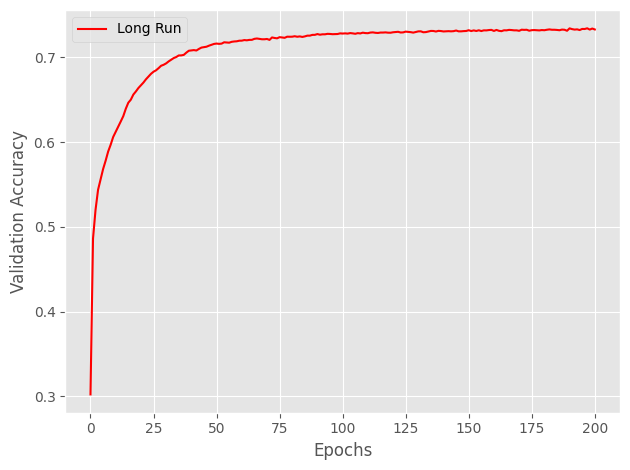

In [ ]:
#just for fun, let's look at the output of what happens when we let our system loose
# these values have been hand tuned
vals = {'n_hidden':30,
         'C':0.1, 'epochs':200, 'eta':0.0001,
         'alpha':0.001, 'decrease_const':1,
         'minibatches':50,
         'shuffle':True,'random_state':1}

nn_long_sigmoid = FourLayerPerceptronBase(**vals)

%time nn_long_sigmoid.fit(X_train, y_train, print_progress=1, XY_test=(X_test,y_test))
print_result(nn_long_sigmoid,X_train,y_train,X_test,y_test,title="Long Run",color="red")

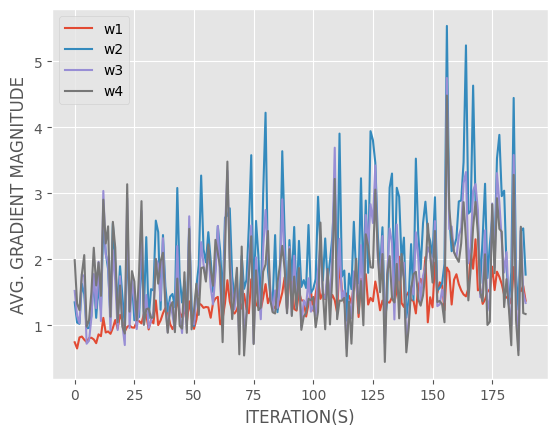

In [ ]:
ax = plt.subplot(1,1,1)
plt.plot(np.abs(nn_long_sigmoid.grad_w1[10:]), label='w1')
plt.plot(np.abs(nn_long_sigmoid.grad_w2[10:]), label='w2')
plt.plot(np.abs(nn_long_sigmoid.grad_w3[10:]), label='w3')
plt.plot(np.abs(nn_long_sigmoid.grad_w4[10:]), label='w4')
plt.legend()
plt.ylabel('AVG. GRADIENT MAGNITUDE')
plt.xlabel('ITERATION(S)')
plt.show()

* [1 points] Repeat the previous step, adding support for a fifth layer.

In [ ]:
from sklearn.metrics import accuracy_score
# just start with the vectorized version and minibatch
class FiveLayerPerceptronBase(FourLayerPerceptronBase):
    def _L2_reg(self, lambda_, W1, W2, W3, W4, W5):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2) + np.mean(W4[:, 1:] ** 2) + np.mean(W5[:, 1:] ** 2))

    def _cost(self,A6,Y_enc,W1,W2,W3,W4,W5):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc * np.log(A6) + (1-Y_enc) * np.log(1-A6))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4, W5)
        return cost + L2_term

    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_))

        init_bound2 = 4*np.sqrt(6 / (self.n_hidden + self.n_hidden))
        W2 = np.random.uniform(-init_bound2, init_bound2,(self.n_hidden, self.n_hidden))

        init_bound3 = 4*np.sqrt(6 / (self.n_hidden + self.n_hidden))
        W3 = np.random.uniform(-init_bound3, init_bound3,(self.n_hidden, self.n_hidden))

        init_bound4 = 4*np.sqrt(6 / (self.n_hidden + self.n_hidden))
        W4 = np.random.uniform(-init_bound4, init_bound4,(self.n_hidden, self.n_hidden))

        init_bound5 = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W5 = np.random.uniform(-init_bound5, init_bound5,(self.n_output_, self.n_hidden))

        # set these to zero to start so that
        # they do not immediately saturate the neurons
        b1 = np.zeros((self.n_hidden, 1))
        b2 = np.zeros((self.n_hidden, 1))
        b3 = np.zeros((self.n_hidden, 1))
        b4 = np.zeros((self.n_hidden, 1))
        b5 = np.zeros((self.n_output_, 1))

        return W1, W2, W3, W4, W5, b1, b2, b3, b4, b5

    def _feedforward(self, X, W1, W2, W3, W4, W5, b1, b2, b3, b4, b5):
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)
        Z4 = W4 @ A4 + b4
        A5 = self._sigmoid(Z4)
        Z5 = W5 @ A5 + b5
        A6 = self._sigmoid(Z5)

        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6

    def _get_gradient(self, A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc, W1, W2, W3, W4, W5):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V5 = A6 - Y_enc
        V4 = A5*(1-A5)*(W5.T @ V5)
        V3 = A4*(1-A4)*(W4.T @ V4)
        V2 = A3*(1-A3)*(W3.T @ V3)
        V1 = A2*(1-A2)*(W2.T @ V2)

        gradW5 = V5 @ A5.T
        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb5 = np.sum(V5, axis=1).reshape((-1,1))
        gradb4 = np.sum(V4, axis=1).reshape((-1,1))
        gradb3 = np.sum(V3, axis=1).reshape((-1,1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))


        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C
        gradW4 += W4 * self.l2_C
        gradW5 += W5 * self.l2_C

        return gradW1, gradW2, gradW3, gradW4, gradW5, gradb1, gradb2, gradb3, gradb4, gradb5

    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4,self.W5, self.b1, self.b2, self.b3, self.b4, self.b5 = self._initialize_weights()

        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum
        rho_W3_prev = np.zeros(self.W3.shape) # for momentum
        rho_W4_prev = np.zeros(self.W4.shape) # for momentum
        rho_W5_prev = np.zeros(self.W5.shape) # for momentum

        # tracking gradient magnitudes
        self.grad_w1 = np.zeros(self.epochs)
        self.grad_w2 = np.zeros(self.epochs)
        self.grad_w3 = np.zeros(self.epochs)
        self.grad_w4 = np.zeros(self.epochs)
        self.grad_w5 = np.zeros(self.epochs)

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            self.val_cost_ = []

        for i in range(self.epochs):

            # adaptive learning rate
            # decrease at certain epochs
            eta = self.eta * self.decrease_const**(np.floor(i/self.decrease_iter))

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(X_data[idx],
                                                       self.W1, self.W2, self.W3, self.W4, self.W5,
                                                       self.b1, self.b2, self.b3, self.b4, self.b5)

                cost = self._cost(A6,Y_enc[:, idx],self.W1,self.W2,self.W3,self.W4,self.W5)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradW3, gradW4, gradW5, gradb1, gradb2, gradb3, gradb4, gradb5 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, A5=A5, A6=A6,
                                                                                    Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4, Z5=Z5,
                                                                                    Y_enc=Y_enc[:, idx], W1=self.W1,W2=self.W2, W3=self.W3, W4=self.W4, W5=self.W5)

                # Track the magnitude of the gradient
                self.grad_w1[i] = np.abs(gradW1).mean()
                self.grad_w2[i] = np.abs(gradW2).mean()
                self.grad_w3[i] = np.abs(gradW3).mean()
                self.grad_w4[i] = np.abs(gradW4).mean()
                self.grad_w5[i] = np.abs(gradW5).mean()

                # simple momentum calculations
                rho_W1, rho_W2, rho_W3, rho_W4, rho_W5 = eta * gradW1, eta * gradW2, eta * gradW3, eta * gradW4, eta * gradW5
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev)) # update with momentum
                self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev)) # update with momentum
                self.W5 -= (rho_W5 + (self.alpha * rho_W5_prev)) # update with momentum

                self.b1 -= eta * gradb1
                self.b2 -= eta * gradb2
                self.b3 -= eta * gradb3
                self.b4 -= eta * gradb4
                self.b5 -= eta * gradb5

                rho_W1_prev, rho_W2_prev, rho_W3_prev, rho_W4_prev, rho_W5_prev = rho_W1, rho_W2, rho_W3, rho_W4, rho_W5


            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))

            # update if a validation set was provided
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test,yhat))

        return self

    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, _, _, _, _, A6 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5)
        y_pred = np.argmax(A6, axis=0)
        return y_pred

Epoch: 200/200

CPU times: user 2min 44s, sys: 1min 51s, total: 4min 35s
Wall time: 3min 5s
Long Run :
Resubstitution acc: 0.7362395571904975
{0, 1, 2, 3}
Validation acc: 0.7356985698569857
{0, 1, 2, 3}


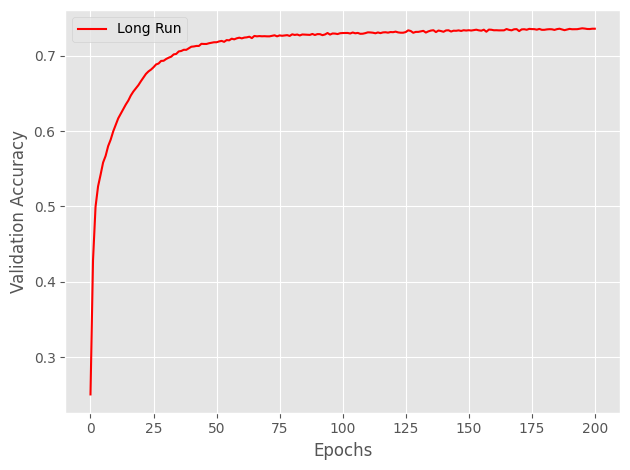

In [ ]:
#just for fun, let's look at the output of what happens when we let our system loose
# these values have been hand tuned
vals = {'n_hidden':30,
         'C':0.1, 'epochs':200, 'eta':0.0001,
         'alpha':0.001, 'decrease_const':1,
         'minibatches':50,
         'shuffle':True,'random_state':1}

nn_long_sigmoid = FiveLayerPerceptronBase(**vals)

%time nn_long_sigmoid.fit(X_train, y_train, print_progress=1, XY_test=(X_test,y_test))
evals4=nn_long_sigmoid.val_score_
print_result(nn_long_sigmoid,X_train,y_train,X_test,y_test,title="Long Run",color="red")

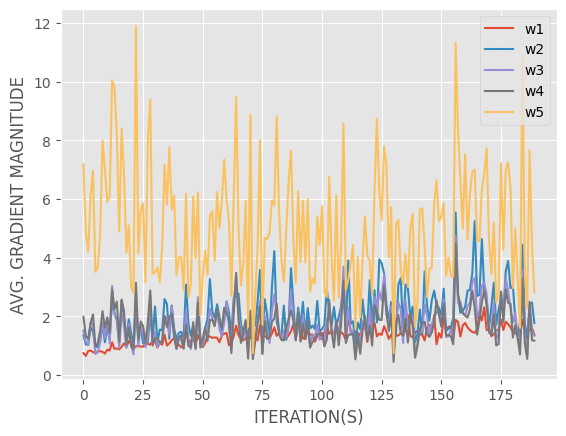

In [ ]:
ax = plt.subplot(1,1,1)
plt.plot(np.abs(nn_long_sigmoid.grad_w1[10:]), label='w1')
plt.plot(np.abs(nn_long_sigmoid.grad_w2[10:]), label='w2')
plt.plot(np.abs(nn_long_sigmoid.grad_w3[10:]), label='w3')
plt.plot(np.abs(nn_long_sigmoid.grad_w4[10:]), label='w4')
plt.plot(np.abs(nn_long_sigmoid.grad_w5[10:]), label='w5')
plt.legend()
plt.ylabel('AVG. GRADIENT MAGNITUDE')
plt.xlabel('ITERATION(S)')
plt.show()

* [2 points] Implement an adaptive learning technique that was discussed in lecture and use it on the five layer network (choose either RMSProp or AdaDelta). Discuss which adaptive method you chose. Compare the performance of your five layer model with and without the adaptive learning strategy. **Do not use AdaM for the adaptive learning technique as it is part of the exceptional work.**

In [ ]:
class TLPRMSProp(FiveLayerPerceptronBase):
    def fit(self, X, y, print_progress=False, XY_test=None):
        """
        our params:
        - X = input features which is a NumPy array of shape [n_samples, n_features]
        - y = target values which is a NumPy array of shape [n_samples]

        """

        # first copy  input data
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)  # one-hot encode the labels for classification

        # initialize network architecture parameters
        self.n_features_ = X_data.shape[1]  # # of features in the input data
        self.n_output_ = Y_enc.shape[0]     # # of output classes
        # initalize weights and biases for all five layers
        self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5 = self._initialize_weights()

        # intilzie adaptive learning rate parameters for RMSProp
        V1_prev = np.zeros(self.W1.shape)
        V2_prev = np.zeros(self.W2.shape)
        V3_prev = np.zeros(self.W3.shape)
        V4_prev = np.zeros(self.W4.shape)
        V5_prev = np.zeros(self.W5.shape)

        self.cost_ = []   # track cost for training data
        self.score_ = []  # track accuracy  for training data
        # initial accuracy score before training starts..
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))

        # track cost and accuracy for validation
        if XY_test is not None:
            X_test, y_test = XY_test
            self.val_score_ = [accuracy_score(y_test,self.predict(X_test))]
            self.val_cost_ = []

        # training starts
        for i in range(self.epochs):
            # adjust learning rate according to epoch number this is our adaptive learning rate
            eta = self.eta * self.decrease_const**(np.floor(i/self.decrease_iter))

            if print_progress > 0 and (i+1) % print_progress == 0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            # shuffling data at the beginning of each epoch
            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            # splitting the training data into mini-batches
            mini_batches = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []  # tracking the cost for each mini-batch
            for idx in mini_batches:
                # forward pass which computes activation/ intermediate layers
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(X_data[idx], self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5)

                # calculate cost for the current mini-batch
                cost = self._cost(A6, Y_enc[:, idx], self.W1, self.W2, self.W3, self.W4, self.W5)
                mini_cost.append(cost)

                # then back prop which computes gradients
                gradW1, gradW2, gradW3, gradW4, gradW5, gradb1, gradb2, gradb3, gradb4, gradb5 = self._get_gradient(A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc[:, idx], self.W1, self.W2, self.W3, self.W4, self.W5)

                # compute the squared gradients for RMSProp adaptation
                G1, G2, G3, G4, G5 = gradW1**2, gradW2**2, gradW3**2, gradW4**2, gradW5**2

                # update the adaptive parameters using a moving average
                V1 = self.alpha*V1_prev + (1 - self.alpha)*G1
                V2 = self.alpha*V2_prev + (1 - self.alpha)*G2
                V3 = self.alpha*V3_prev + (1 - self.alpha)*G3
                V4 = self.alpha*V4_prev + (1 - self.alpha)*G4
                V5 = self.alpha*V5_prev + (1 - self.alpha)*G5

                # apply RMSProp to adjust learning rates based on moving average of squared gradients
                rho_W1, rho_W2, rho_W3, rho_W4, rho_W5 = eta/np.sqrt(V1+1e-7) * gradW1, eta/np.sqrt(V2+1e-7) * gradW2, eta/np.sqrt(V3+1e-7) * gradW3, eta/np.sqrt(V4+1e-7) * gradW4, eta/np.sqrt(V5+1e-7) * gradW5

                # weights and biases
                self.W1 -= rho_W1
                self.W2 -= rho_W2
                self.W3 -= rho_W3
                self.W4 -= rho_W4
                self.W5 -= rho_W5
                self.b1 -= eta * gradb1
                self.b2 -= eta * gradb2
                self.b3 -= eta * gradb3
                self.b4 -= eta * gradb4
                self.b5 -= eta * gradb5

                # prepare for the next iteration
                V1_prev, V2_prev, V3_prev, V4_prev, V5_prev = V1, V2, V3, V4, V5

            #average cost of this epoch and the accuracy score
            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data, self.predict(X_data)))

            #evaluate and record validation accuracy
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test, yhat))

        return self


Epoch: 200/200

CPU times: user 2min 44s, sys: 1min 51s, total: 4min 35s
Wall time: 3min 9s
Long Run :
Resubstitution acc: 0.7237425654072266
{0, 1, 2, 3}
Validation acc: 0.7223597359735974
{0, 1, 2, 3}


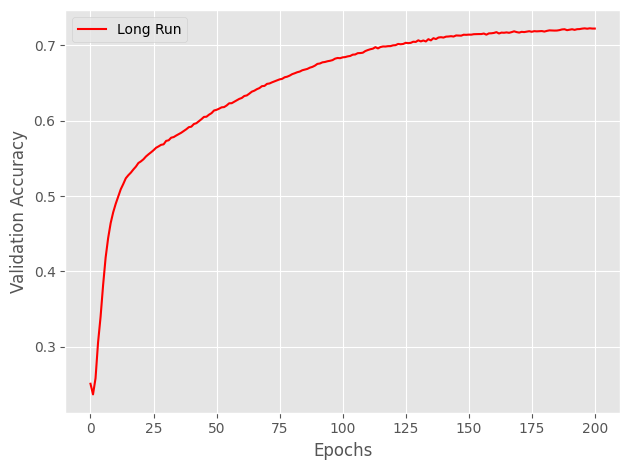

In [ ]:
# just for fun, let's look at the output of what happens when we let our system loose
# these values have been hand tuned
vals = { 'n_hidden':30,
         'C':0.1, 'epochs':200, 'eta':0.0001,
         'alpha':0.001, 'decrease_const': 1, 'minibatches':50,
         'shuffle':True,'random_state':1 }

nn_long_sigmoid = TLPRMSProp(**vals)

%time nn_long_sigmoid.fit(X_train, y_train, print_progress=1, XY_test=(X_test,y_test))
evals5=nn_long_sigmoid.val_score_
print_result(nn_long_sigmoid,X_train,y_train,X_test,y_test,title="Long Run",color="red")

In [ ]:
from sklearn.model_selection import cross_val_score
print('Mean Score for Model 4, standard 5-layer:', np.mean(evals4))
print('Mean Score for Model 5, with RMSProp:', np.mean(evals5))


# t = 2.26 / np.sqrt(10)
t= 1.96

# model 4 and 5
e_list = [(1-evals4[i]) - (1-evals5[i])for i in range(len(evals4))]
# e = (1-evals1) - (1-evals2)
stdtot = np.std(e_list)
dbar = np.mean(e_list)
print('Interval for Model 4 and 5:', dbar-t*stdtot, dbar+t*stdtot)


Mean Score for Model 4, standard 5-layer: 0.7105982053429223
Mean Score for Model 5, with RMSProp: 0.649562624172865
Interval for Model 4 and 5: -0.15315384545170974 0.031082683111595122


RMSProp is chosen for its adaptive learning rate mechanism because it addresses limitations of AdaGrad and other gradient descent methods. However the effectiveness of any optimization technique is deffinetly dependent on the data. We decided to do RMSProp because its calculations were very similar to AdaGrad which we implemented before intially and then further realized we needed should try RMSProp instead. The mean score for model 4 of the standard 5-layer is greather than the mean score for the model with RMSProp, however the confidence interval for model 4 and 5 contains 0. Because of this there might not be a significant statistical difference in performance between these two models 4 and 5 the chosen level of confidence.

## **Exceptional Work (1 Points Total)**


*   5000 level student: You have free reign to provide additional analyses.



### **Sources Used:**
* For the labelEncoder function: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html